In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from io import StringIO

data = {
    'Category': ["Age", "Disability", "Feminine", "General", "Masculine", "Neutral", "Racial", "Sexuality"],
    'FT Flan T5 XL':            [0.71, 0.55, 0.91, 0.68, 0.74, 0.53, 0.83, 0.88],
    'FT BERT base uncased':     [0.66, 0.54, 0.94, 0.38, 0.61, 0.47, 0.85, 0.87],
    'pZS GPT-4o-2024-05-13':    [0.70, 0.59, 0.85, 0.31, 0.52, 0.33, 0.64, 0.40],
    'pSC Phi3-7B 8K':           [0.57, 0.63, 0.89, 0.36, 0.53, 0.34, 0.74, 0.69],
}

df = pd.DataFrame(data)
df = df.set_index('Category').transpose()
#df['model'] = df.index
#df.reset_index(drop=True, inplace=True)
#col = df.pop(df.columns[-1])
#df.insert(0, col.name, col)
#df = pd.read_json(StringIO(df.to_json()))
df

Category,Age,Disability,Feminine,General,Masculine,Neutral,Racial,Sexuality
FT Flan T5 XL,0.71,0.55,0.91,0.68,0.74,0.53,0.83,0.88
FT BERT base uncased,0.66,0.54,0.94,0.38,0.61,0.47,0.85,0.87
pZS GPT-4o-2024-05-13,0.70,0.59,0.85,0.31,0.52,0.33,0.64,0.40
pSC Phi3-7B 8K,0.57,0.63,0.89,0.36,0.53,0.34,0.74,0.69


In [5]:
list(df.columns)

['Age',
 'Disability',
 'Feminine',
 'General',
 'Masculine',
 'Neutral',
 'Racial',
 'Sexuality']

0.0
0.7853981633974483
1.5707963267948966
2.356194490192345
3.141592653589793
3.9269908169872414
4.71238898038469
5.497787143782138


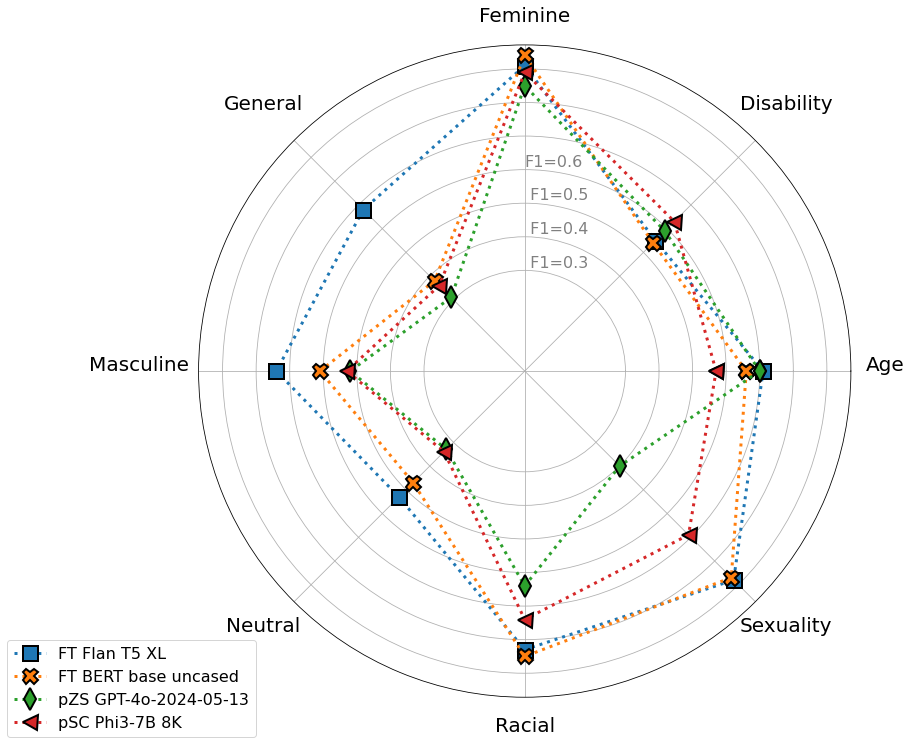

In [6]:
bias_categories = list(df.columns)

# Compute angles and repeat the first category to close the loop
angles = np.linspace(0, 2 * np.pi, len(bias_categories), endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(polar=True))
plt.xticks(angles[:-1], ["","","","","","","",""], fontsize=20)

# Adjusting the distance of the category labels from the axis
#ax.tick_params(pad=45)

# Helper function to plot each line(model)
def add_line(model_name, linestyle, marker):
    values = df.loc[model_name].tolist()
    values += values[:1]  # repeat the first value to close the circular graph
    ax.plot(angles, values, linewidth=3, linestyle=linestyle, marker=marker, markersize=15, markeredgewidth=2, markeredgecolor='black',label=model_name)


# Draw lines for each model
linestyles = [':', ':', ':', ':', ':'] # dotted
#linestyles = ['-', '--', '-.', ':']
markers = ['s', 'X', 'd', '<', 'v', '*', 'p', '^']
#markers = ['o', 'v', '^', '<', '>', 's', 'p', '*']
for i, model in enumerate(df.index):
    add_line(model, linestyles[i % len(linestyles)], markers[i % len(markers)])


# Manually add labels with adjusted padding
label_offset = 0.1  # Adjust this value to move the labels further from the plot
for angle, label in zip(angles[:-1], bias_categories):
    angle_rad = angle
    print(angle_rad)
    if angle_rad == 0:  # Adjust the label at 0 degrees separately
        ax.text(angle_rad, 1 + label_offset * 0.75, label, horizontalalignment='center', size=20)
    
    elif angle_rad == np.pi:  # Adjust the label at 180 degrees separately
        ax.text(angle_rad, 1 + label_offset * 1.5, label, horizontalalignment='center', size=20)
    elif angle_rad == np.pi / 2:  # Adjust the label at 90 degrees separately
        ax.text(angle_rad, 1 + label_offset * 0.4, label, horizontalalignment='center', size=20)
    elif angle_rad == np.pi * 1.5:  # Adjust the label at 270 degrees separately
        ax.text(angle_rad, 1 + label_offset * .75, label, horizontalalignment='center', size=20)
    else:
        ax.text(angle_rad, 1 + label_offset, label, horizontalalignment='center', size=20)


ax.set_rlabel_position(90)
plt.yticks([0.3, 0.4, 0.5, 0.6,0.7, 0.8, 0.9], [" F1=0.3", " F1=0.4"," F1=0.5", "F1=0.6","", "", ""], color="grey",size=16) 

plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), fontsize=16)  # Change the fontsize here
plt.show()